In [1]:
import prj_plotter as pp

False


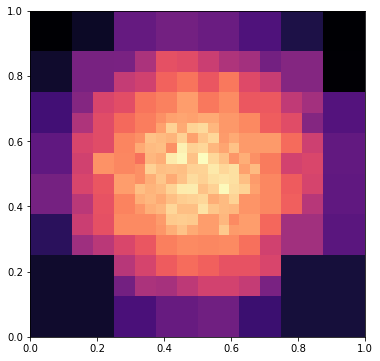

In [2]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

t = pp.Quadtree(0,0,1,1,100,6)
rng = np.random.default_rng(42)

N_size = 10000
x = rng.normal(0.5, 0.2, N_size)
y = rng.normal(0.5, 0.2, N_size)
# x = rng.random(N_size)
# y = rng.random(N_size)
# x = [-0.1,0.05,0.2,0.1,0.3,0.4]
# y = [-0.1,0.05,0.2,0.1,0.3,0.4]

print(t.insert_many(x,y))

fig, ax0 = plt.subplots(1, 1, figsize=(6,6), sharex=True, sharey=True)

ss = t.plot_grid()
# for s in ss:
#     ax0.plot([s.x1,s.x2], [s.y1,s.y2], c='k', lw=1)
    
cmap = plt.cm.magma
ps = t.plot_density()
values = [p.value for p in ps]
cmin = 3
cmax = np.log10(np.max(values))
for p in ps:
    c = np.log10(p.value)
    c = (c - cmin) / (cmax - cmin)
    patch = mpl.patches.Rectangle((p.x,p.y), p.width, p.height, fc=cmap(c), ec='none')
    ax0.add_patch(patch)
    
# ax0.scatter(x,y, c='r', s=1)

ax0.set_xlim(0,1)
ax0.set_ylim(0,1)

plt.show()

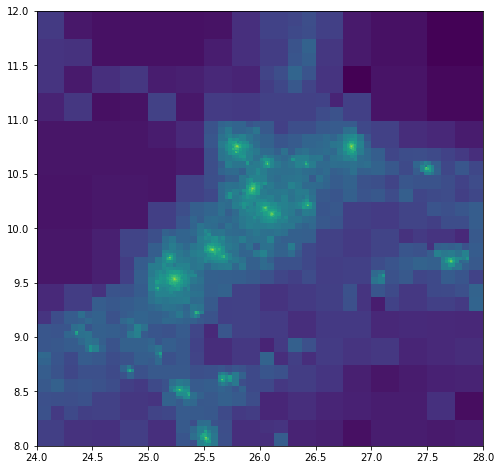

In [5]:
import illustris_python as il

fig, ax0 = plt.subplots(1, 1, figsize=(8,8), sharex=True, sharey=True)

basePath = '/Users/ybchen/Documents/mesh_illustris/docs/source/cookbook/TNG50-4-Subbox0/output'
dm_pos = il.snapshot.loadSubset(basePath,2332,'dm',['Coordinates'])

x = dm_pos[:,0] / 1000 # in Mpc/h
y = dm_pos[:,1] / 1000 # in Mpc/h

# t = pp.Quadtree(24,8,4,4,64,10)
# t.insert_many(x,y)

# ss = t.plot_grid()
# # for s in ss:
# #     ax0.plot([s.x1,s.x2], [s.y1,s.y2], c='w', lw=0.5)
    
# cmap = plt.cm.magma
# ps = t.plot_density()
# values = [p.value for p in ps]
# cmin = 2
# cmax = 7
# for p in ps:
#     c = np.log10(p.value)
#     c = np.clip((c - cmin) / (cmax - cmin),0,1)
#     patch = mpl.patches.Rectangle((p.x,p.y), p.width, p.height, fc=cmap(c), ec=cmap(c))
#     ax0.add_patch(patch)
    
pp.prj(ax0, x, y, [24,8,4,4], 2, 7, capacity=64, cmap=plt.cm.viridis)
    
# ax0.scatter(x,y, c='r', s=1)

ax0.set_xlim(24,28)
ax0.set_ylim(8,12)

plt.show()